In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
#path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
df = pd.read_excel("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", header=None, skiprows=5)


In [2]:
df.columns = ['City', 'Population', 'Violent', 'Murder', 'Rape_def1', 'Rape_def2', 'Robbery', 'Aggravated'
              , 'Property_crime', 'Burglary', 'Larceny', 'Motor_vehicle_teft', 'Arson']

In [3]:
df.head(5)

,City,Population,Violent,Murder,Rape_def1,Rape_def2,Robbery,Aggravated,Property_crime,Burglary,Larceny,Motor_vehicle_teft,Arson
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [4]:
df.isnull().sum()

City                    0
Population              3
Violent                 3
Murder                  3
Rape_def1             351
Rape_def2               3
Robbery                 3
Aggravated              3
Property_crime          3
Burglary                3
Larceny                 3
Motor_vehicle_teft      3
Arson                 164
dtype: int64

In [5]:
# drop Rape_def1 as it contains no information, almost half of Arson variable is nan as well
df = df.drop('Rape_def1', axis=1)
df = df.drop('Arson', axis=1)

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

City                  0
Population            0
Violent               0
Murder                0
Rape_def2             0
Robbery               0
Aggravated            0
Property_crime        0
Burglary              0
Larceny               0
Motor_vehicle_teft    0
dtype: int64

In [8]:
df.shape

(348, 11)

In [9]:
df.head()

,City,Population,Violent,Murder,Rape_def2,Robbery,Aggravated,Property_crime,Burglary,Larceny,Motor_vehicle_teft
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0


In [10]:
df['Robbery'] = (df['Robbery'] > 0).astype(int)
df['Murder'] = (df['Murder'] > 0).astype(int)

In [11]:
df['Population_sq'] = (df['Population'] * df['Population'])

In [12]:
df.head()

,City,Population,Violent,Murder,Rape_def2,Robbery,Aggravated,Property_crime,Burglary,Larceny,Motor_vehicle_teft,Population_sq
0,Adams Village,1861.0,0.0,0,0.0,0,0.0,12.0,2.0,10.0,0.0,3.463321e+06
1,Addison Town and Village,2577.0,3.0,0,0.0,0,3.0,24.0,3.0,20.0,1.0,6.640929e+06
2,Akron Village,2846.0,3.0,0,0.0,0,3.0,16.0,1.0,15.0,0.0,8.099716e+06
3,Albany,97956.0,791.0,1,30.0,1,526.0,4090.0,705.0,3243.0,142.0,9.595378e+09
4,Albion Village,6388.0,23.0,0,3.0,1,16.0,223.0,53.0,165.0,5.0,4.080654e+07


In [13]:
df.describe()

,Population,Violent,Murder,Rape_def2,Robbery,Aggravated,Property_crime,Burglary,Larceny,Motor_vehicle_teft,Population_sq
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,3.480000e+02
mean,4.003763e+04,201.594828,0.140805,5.864943,0.600575,121.261494,792.606322,119.683908,637.017241,35.905172,2.035547e+11
std,4.500374e+05,2815.268504,0.348321,60.425452,0.490486,1706.131730,7659.724746,924.948789,6346.054451,403.423826,3.778876e+12
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,9.018117e+06
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,5.232568e+07
75%,1.842750e+04,22.000000,0.000000,2.000000,1.000000,14.000000,341.000000,51.250000,287.250000,7.000000,3.397536e+08
max,8.396126e+06,52384.000000,1.000000,1112.000000,1.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,7.049493e+13


### Building Regression Model 

In [27]:
# Extract dependent and independent variables 
df1 = df[['Population','Violent', 'Murder', 'Rape_def2', 'Robbery', 'Burglary']]#.dropna()
x = df1
y = df['Property_crime']
df1.head()

,Population,Violent,Murder,Rape_def2,Robbery,Burglary
0,1861.0,0.0,0,0.0,0,2.0
1,2577.0,3.0,0,0.0,0,3.0
2,2846.0,3.0,0,0.0,0,1.0
3,97956.0,791.0,1,30.0,1,705.0
4,6388.0,23.0,0,3.0,1,53.0


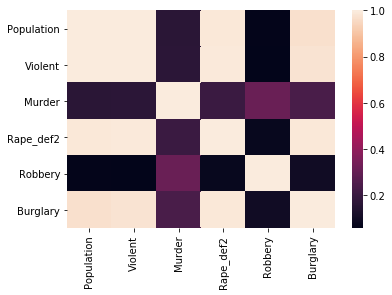

In [28]:
sns.heatmap(df1.corr())
# The variables seem to show multicollinarity. PCA will be applied before the model  


In [35]:
# normalize the data before PCA 
X_nor = StandardScaler().fit_transform(x)

In [39]:
pca =PCA(n_components=4)
X_reg = pca.fit_transform(X_nor)
print(pca.explained_variance_ratio_)

[0.67065148 0.21083975 0.11310755 0.00512845]


In [40]:
# spliting the components from pca for test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_reg, y, test_size = 0.2, random_state = 0)

In [41]:
# fit the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Predict the test result 
y_pred = regressor.predict(x_test)


In [44]:
# calculate the coeficinets 
print(regressor.coef_)

[3797.57979196  520.46439077 -284.28678769 -747.61787971]


In [45]:
# Calculate the intercept
print(regressor.intercept_)

795.0649899363087


In [46]:
# calculate the R squered value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.8601373807855742